# Data Scientist Associate Practical Exam

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"data/moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [98]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
sns.set()
#We will first import our csv file and read it as a dataframe
moped= pd.read_csv("data/moped.csv")
moped

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...
708,Commuting,> 6 months,Gemopai Ryder,2.0,2.0,NaN,2.0,NaN,3.0
709,Leisure,<= 6 months,Gemopai Ryder,5.0,5.0,5.0,NaN,5.0,NaN
710,Commuting,> 6 months,Gemopai Ryder,2.0,2.0,3.0,NaN,1.0,NaN
711,Commuting,<= 6 months,Gemopai Ryder,4.0,4.0,NaN,4.0,NaN,5.0


In [99]:
moped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


Lets check to see if there any inconsistent data in our dataframe or any values that contradicts the data dictionaary

In [100]:
for col in moped.columns:
    print('-------{}--------\n{}'.format(col, moped[col].unique()))

-------Used it for--------
['Commuting' 'Leisure']
-------Owned for--------
['Never owned' '> 6 months' '<= 6 months']
-------Model Name--------
['TVS iQube' 'Revolt RV 400' 'Bajaj Chetak' 'OLA S1 Pro' 'Ather 450X'
 'Hero Electric Optima' 'Tork Kratos' 'OLA S1' 'Bounce Infinity E1'
 'Hero Electric Optima CX' 'Hero Electric Flash' 'Ampere Magnus EX'
 'Revolt RV 300' 'Hero Electric Photon' 'Okinawa Praise' 'Benling Aura'
 'Ampere Magnus Pro' 'PURE EV EPluto 7G' 'Ampere REO' 'Odysse Evoqis'
 'Okinawa i-Praise' 'Joy e-bike Monster' 'PURE EV ETrance Neo'
 'Evolet Polo' 'Okinawa Ridge Plus' 'Ampere Zeal' 'Hero Electric Atria'
 'Okinawa Lite' 'Hero Electric NYX' 'Okinawa R30' 'Yo Drift' 'BGauss B8'
 'Joy e-bike Wolf' 'Gemopai Astrid Lite' 'Techo Electra Emerge'
 'Techo Electra Raptor' 'e-bike Gen Nxt' 'Gemopai Ryder']
-------Visual Appeal--------
[3. 4. 1. 5. 2.]
-------Reliability--------
[4. 1. 2. 3. 5.]
-------Extra Features--------
[nan  4.  5.  1.  3.  2.]
-------Comfort--------
[ 4.  3.

There's no value in the dataframe that is inconsistent or that contradicts the columns datatype as stated in the data dictionary

We will now combine the '>6 months' and '<=6 months' values of the 'Owned for' column

In [101]:
dict_replace= {'> 6 months': 'Owned', '<= 6 months': 'Owned'}
moped.replace(dict_replace, inplace= True)
moped.head()

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,Owned,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,Owned,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,Owned,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,Owned,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0


The 'owned for' column will now be renamed so as to match the new values in the column

In [102]:
moped.rename(columns= {'Owned for': 'Ownership'}, inplace= True)

We will now search for missing values and impute the value of zero for any one we find

In [103]:
moped.isnull().sum()

Used it for           0
Ownership             0
Model Name            0
Visual Appeal         0
Reliability           0
Extra Features      530
Comfort             203
Maintenance cost    537
Value for Money     343
dtype: int64

In [104]:
moped.fillna(0, inplace= True)
moped.isnull().sum()

Used it for         0
Ownership           0
Model Name          0
Visual Appeal       0
Reliability         0
Extra Features      0
Comfort             0
Maintenance cost    0
Value for Money     0
dtype: int64

All the missing values in our dataframe has been imputed with the value of zero

The 'used it for' column and the 'ownership' column will be converted to the category datatype since it is a has categorical values

In [105]:
moped[['Used it for', 'Ownership']]= moped[['Used it for', 'Ownership']].astype('category')
moped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Used it for       713 non-null    category
 1   Ownership         713 non-null    category
 2   Model Name        713 non-null    object  
 3   Visual Appeal     713 non-null    float64 
 4   Reliability       713 non-null    float64 
 5   Extra Features    713 non-null    float64 
 6   Comfort           713 non-null    float64 
 7   Maintenance cost  713 non-null    float64 
 8   Value for Money   713 non-null    float64 
dtypes: category(2), float64(6), object(1)
memory usage: 40.8+ KB


## Data Validation
Describe the validation tasks you completed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

1. The datatype of each column was checked to see if it matched with the data dictionary.
2. The unique values for each column in the dataframe was checked
3. I combined the '>6 months' and '<=6 months' values of the 'Owned for' column
4. The 'Owned for' column to was renamed to 'Ownership'
5. The missing values in the 'Extra Features', 'Comfort ','Maintenance cost','Value for Money' column was replaced with the value 0  
6. The datatype of the 'Ownership' and 'Used it for' column was converted to the category datatype


Before we can check for correlation and other summary statistics, we need to replace the 0 placeholder with NaN.

In [106]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data
moped_raw= moped.replace(0, np.nan)
moped.describe(include='all')
 

,Used it for,Ownership,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
count,713,713,713,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
unique,2,2,38,NaN,NaN,NaN,NaN,NaN,NaN
top,Commuting,Owned,Hero Electric Flash,NaN,NaN,NaN,NaN,NaN,NaN
freq,553,578,94,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.768583,3.314165,0.751753,2.611501,0.837307,1.748948
std,NaN,NaN,NaN,1.359949,1.584523,1.524639,2.031834,1.617638,2.011924
min,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,4.000000,0.000000,3.000000,0.000000,1.000000
75%,NaN,NaN,NaN,5.000000,5.000000,1.000000,5.000000,0.000000,4.000000


We will create a visualizations of the value counts of the 'Model Name' column to see the most popular model in our dataframe

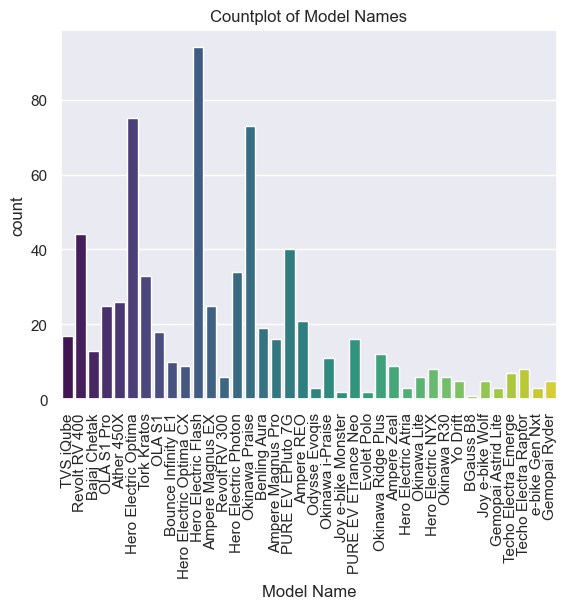

In [107]:
sns.countplot(x= 'Model Name', data= moped_raw, palette= 'viridis')
plt.title('Countplot of Model Names')
plt.xticks(rotation= 90)
plt.show()

Hero electric flash is the popular moped model in the dataset, followed by the Hero electric optima model. Also there are 38 different models of moped in our dataset

Text(0.5, 1.0, 'Countplot of Moped Owners')

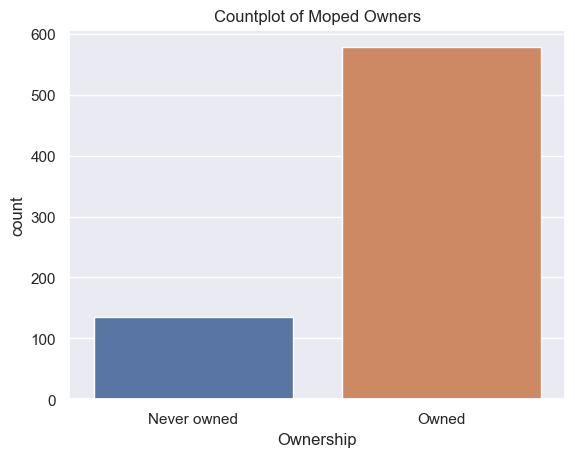

In [108]:
sns.countplot(x= 'Ownership', data= moped_raw)
plt.title('Countplot of Moped Owners')

Majority of the reviews in our data comes from owners of a moped 

Now we will group by the model name and find the mean rating score for each of the rating categories for the different model names

In [109]:
num= moped_raw.select_dtypes(include= ['float'])
num_cols= num.columns
moped_model_df= moped_raw.groupby('Model Name')[num_cols].mean()
moped_model_df

,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
Model Name,,,,,,
Ampere Magnus EX,4.160000,3.760000,3.600000,5.000000,4.055556,5.000000
Ampere Magnus Pro,3.312500,3.437500,2.933333,4.000000,3.571429,4.000000
Ampere REO,3.190476,2.761905,1.000000,3.050000,1.000000,3.052632
Ampere Zeal,3.777778,2.888889,2.800000,2.500000,3.200000,2.750000
Ather 450X,4.076923,3.923077,3.000000,3.833333,3.500000,NaN
BGauss B8,1.000000,1.000000,1.000000,NaN,2.000000,NaN
Bajaj Chetak,4.538462,4.307692,4.500000,4.181818,4.500000,4.800000
Benling Aura,3.631579,2.947368,2.687500,2.000000,3.125000,1.500000
Bounce Infinity E1,3.200000,2.600000,NaN,3.100000,NaN,2.900000


The Ampere magnus EX has the highest 'value for money' and 'Comfort' rating on average while the Evolet Polo and the Odysse Evoqis has the highest 'visual rating' on average

Now let's group by model and plot the mean values in a pairplot to get an idea if there is a correlation between the mean scores of a moped between variables

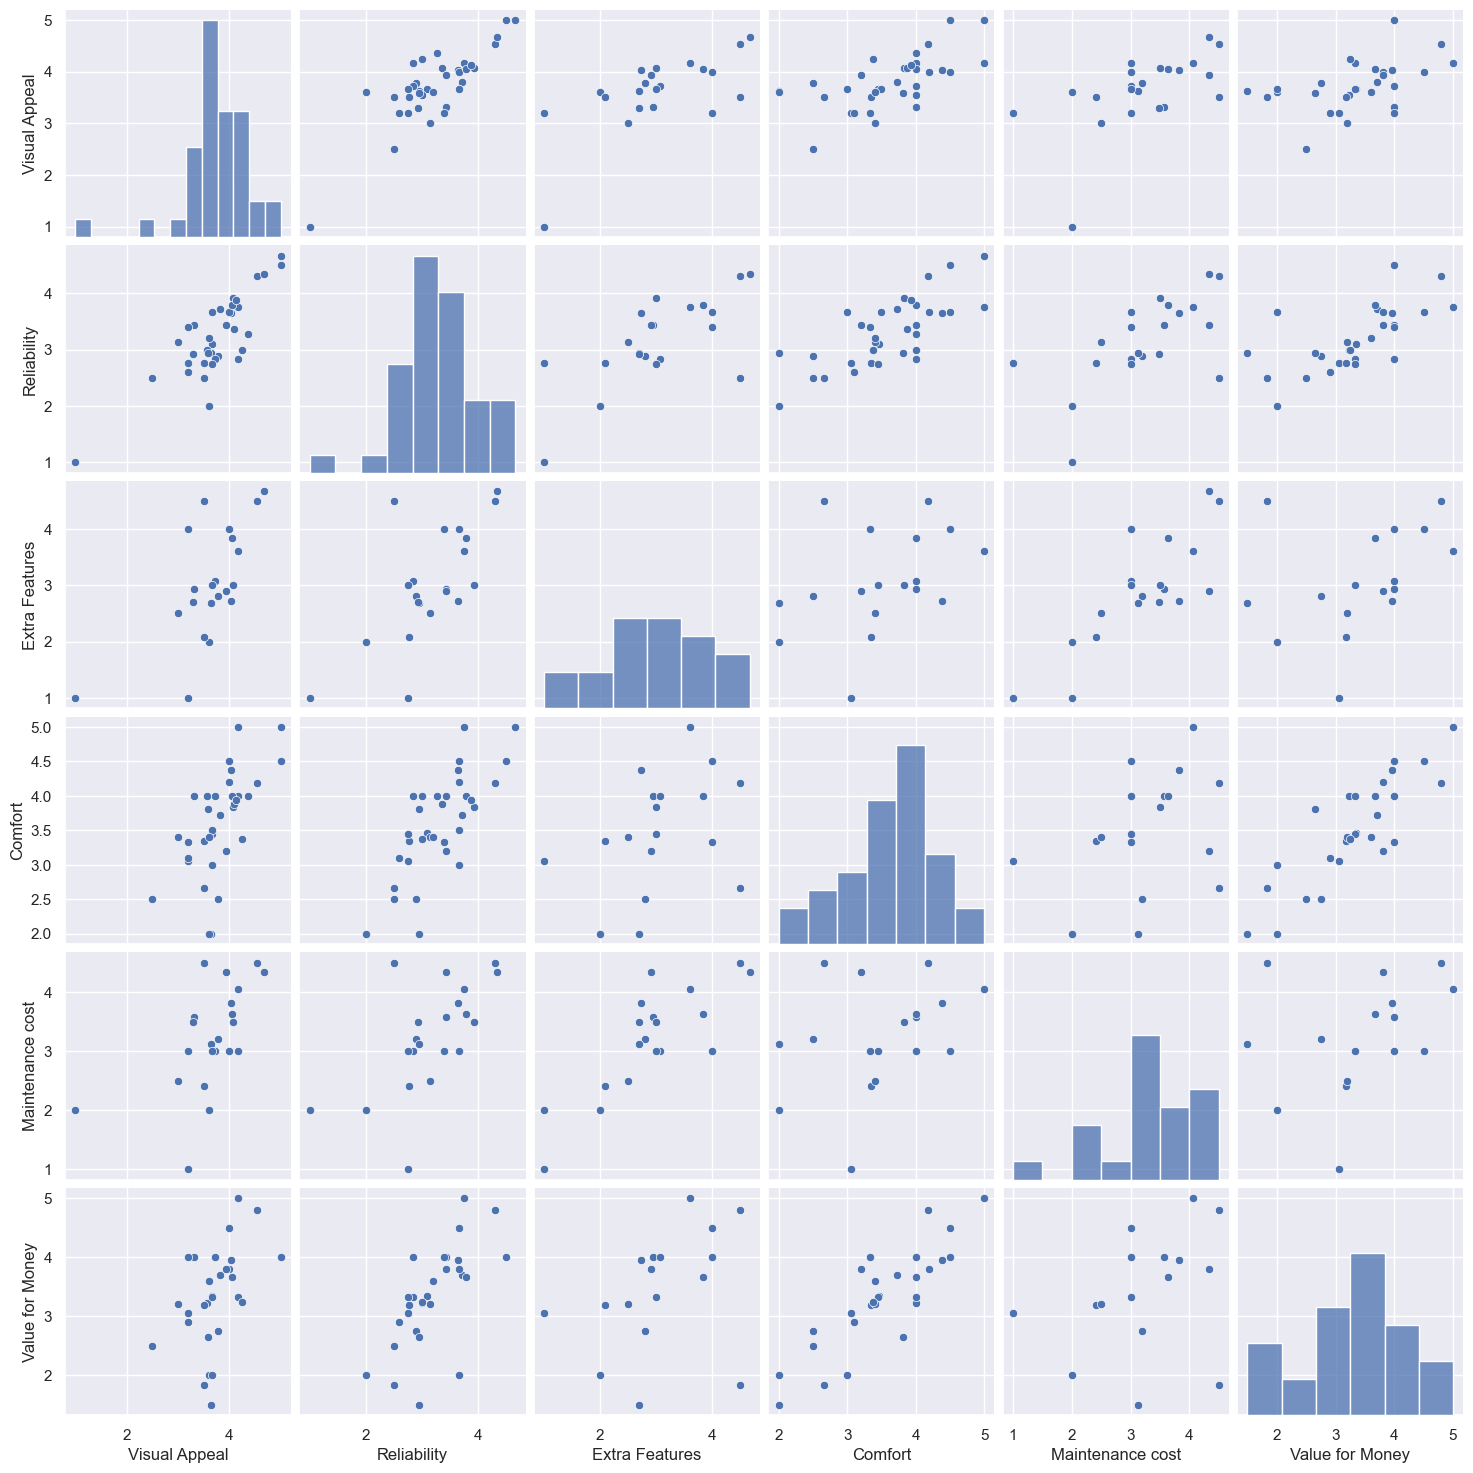

In [110]:
sns.pairplot(moped_model_df)

There does seem to be a significant correlation between a moped model's mean ratings in different categories. Categories that have fewer total responses seem to have more dispersion. Let's visualize the correlation matrix of ratings between categories on the total dataset.

<AxesSubplot:>

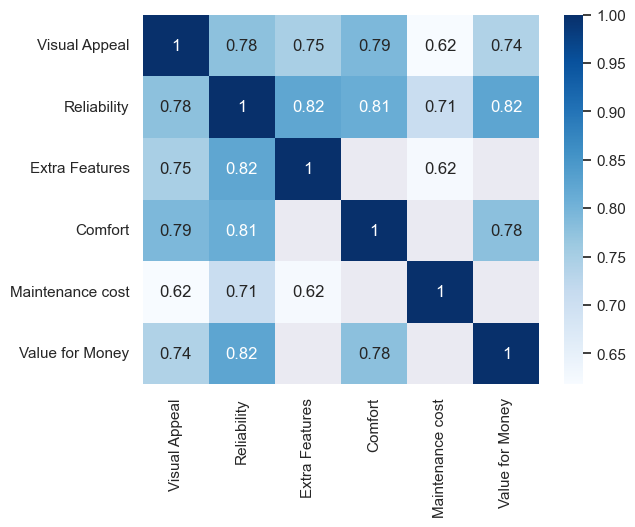

In [111]:
sns.heatmap(moped_raw.corr(), annot= True, cmap= 'Blues')

We see that in the categories of 'Extra Features', 'Comfort', 'Maintenance cost', and 'Value for Money' the reviews do not overlap in all categories this could be due to the missing values, let investigate further

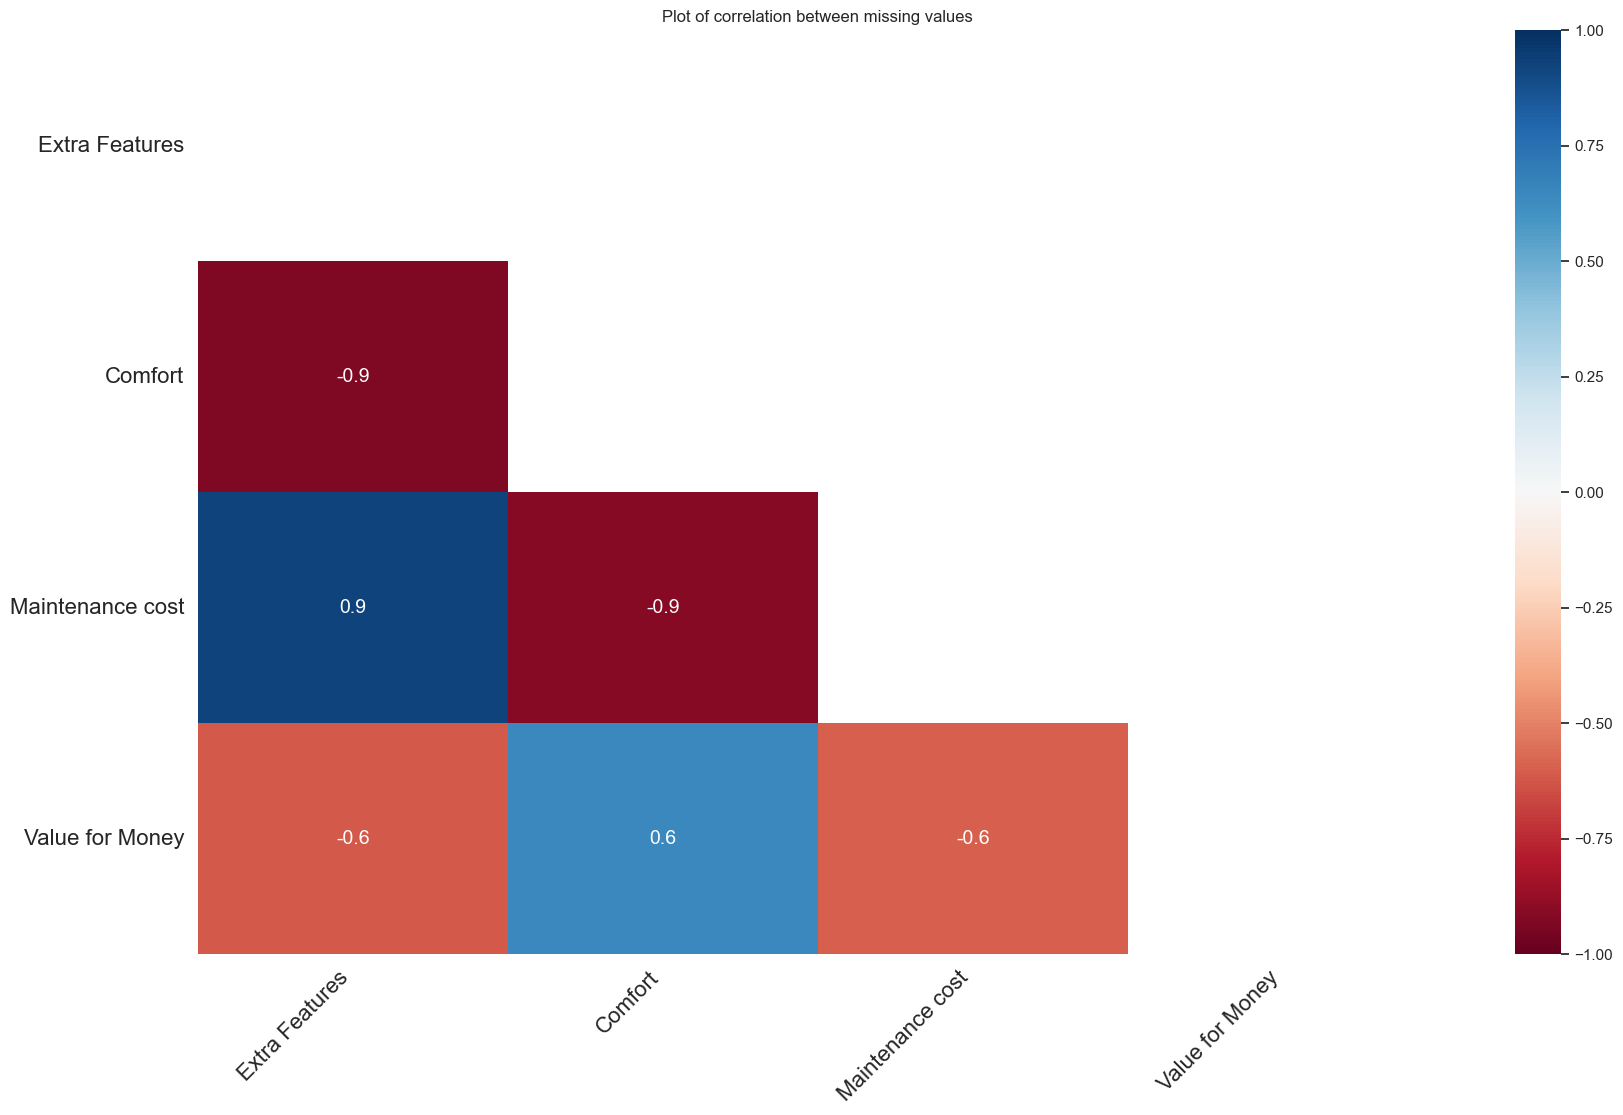

In [112]:
msno.heatmap(moped_raw)
plt.title('Plot of correlation between missing values')
plt.show()

<AxesSubplot:>

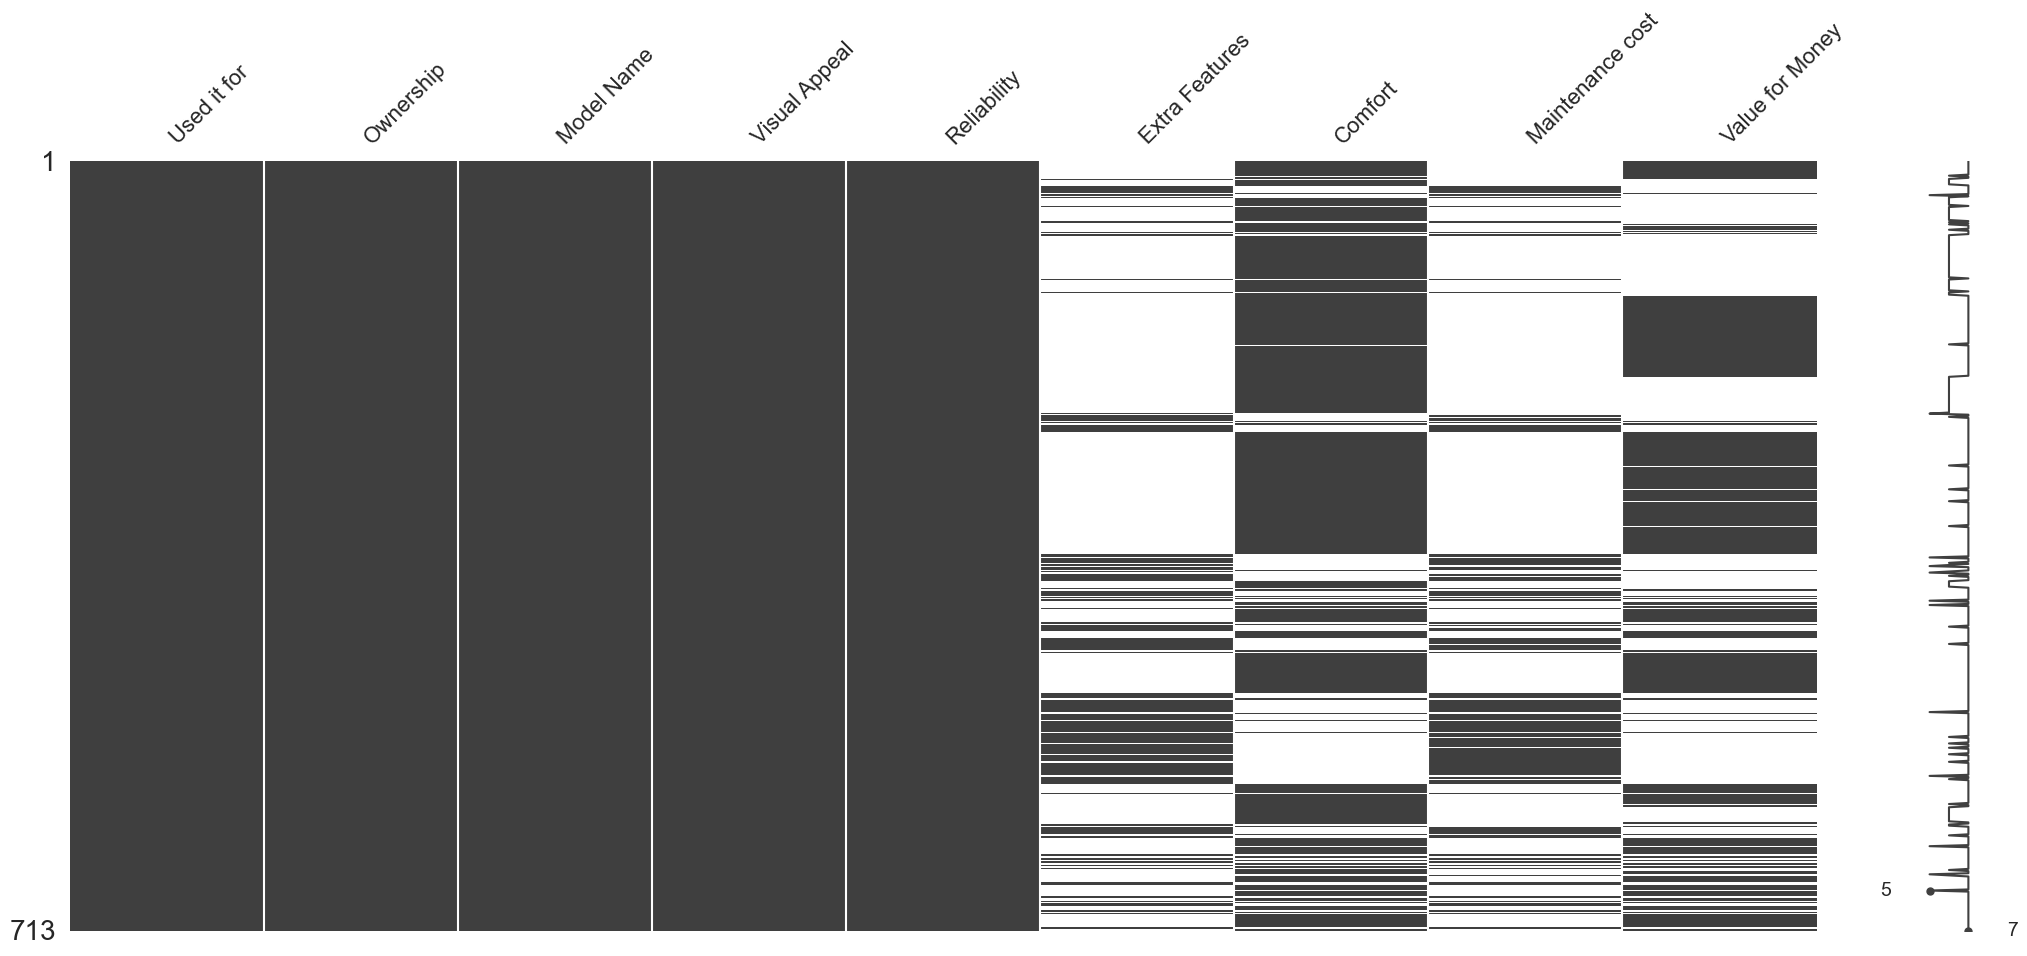

In [113]:
msno.matrix(moped_raw)

As can be seen from the plots, the reason why there is no overlap between the ratings categories is due to the fact that respondants to Extra Features did not respond to 'Comfort' or 'Value for Money', only 'Maintenance cost'. "Comfort" respondents answered to 'Value for money' but not the other two. Possibly the rewiew questionaires only contained one of those two pairs.

Visual Appeal, Reliability, Extra Features, Comfort, Maintenance cost, and Value for Money are all positively correlated with each other. This makes sense, as users who like a product tend to rate the product higher across all metrics. 

Since there are a lot of missing values in the ratings columns in our dataset, we can create a column that consists of the mean of the four ratings and visualize its distribution.

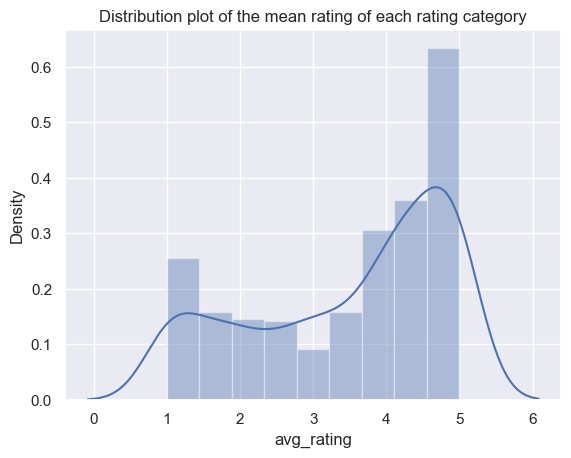

In [114]:
moped_raw['avg_rating']= moped_raw.mean(numeric_only= True, axis= 1)
sns.distplot(moped_raw.avg_rating)
plt.title('Distribution plot of the mean rating of each rating category')
plt.show()


Text(0.5, 1.0, 'Boxplot of the mean rating of each rating category')

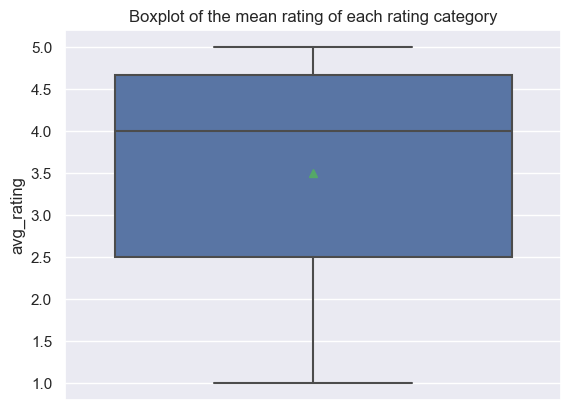

In [115]:
sns.boxplot(y= 'avg_rating', data= moped_raw, showmeans= True)
plt.title('Boxplot of the mean rating of each rating category')


Majority of the mean rating for each moped fall between 4-5 mean rating score, this is the reason for the shift in median value. Minority of it fall between the 1-2 mean rating score and few has a mean rating of 3

 Lets see what impact Ownership and Commuting have on the data.

In [116]:
num_col= list(num_cols)
num_col.append('avg_rating')
ownership_mean_rating= pd.pivot_table(index= 'Ownership', values= num_col, data= moped_raw)
ownership_mean_rating

,Comfort,Extra Features,Maintenance cost,Reliability,Value for Money,Visual Appeal,avg_rating
Ownership,,,,,,,
Never owned,4.194444,4.125000,3.913043,4.125926,4.2200,4.266667,4.173457
Owned,3.504975,2.748428,3.313725,3.124567,3.2375,3.652249,3.346309


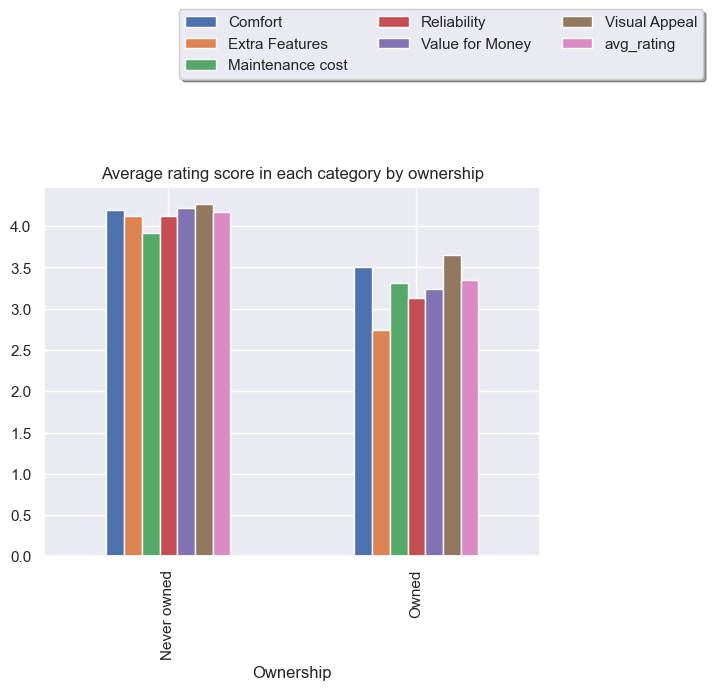

In [117]:
ownership_mean_rating.plot(kind= 'bar')
plt.title('Average rating score in each category by ownership')
plt.legend(loc= 'upper center', bbox_to_anchor=(0.8, 1.5),
ncol=3, fancybox=True, shadow=True)
plt.show()

Reviewers who do not own the mopeds on average rate them about 20% higher than those who own the moped being reviewed.

Lets see if it is similar to the 'Commuting' and 'Leisure' category of persons

In [118]:
used_for_rating= pd.pivot_table(index= 'Used it for', values= num_col, data= moped_raw)
used_for_rating

,Comfort,Extra Features,Maintenance cost,Reliability,Value for Money,Visual Appeal,avg_rating
Used it for,,,,,,,
Commuting,3.489796,2.875000,3.425532,3.159132,3.201342,3.687161,3.377637
Leisure,4.186441,3.128205,3.257143,3.850000,4.069444,4.050000,3.935938


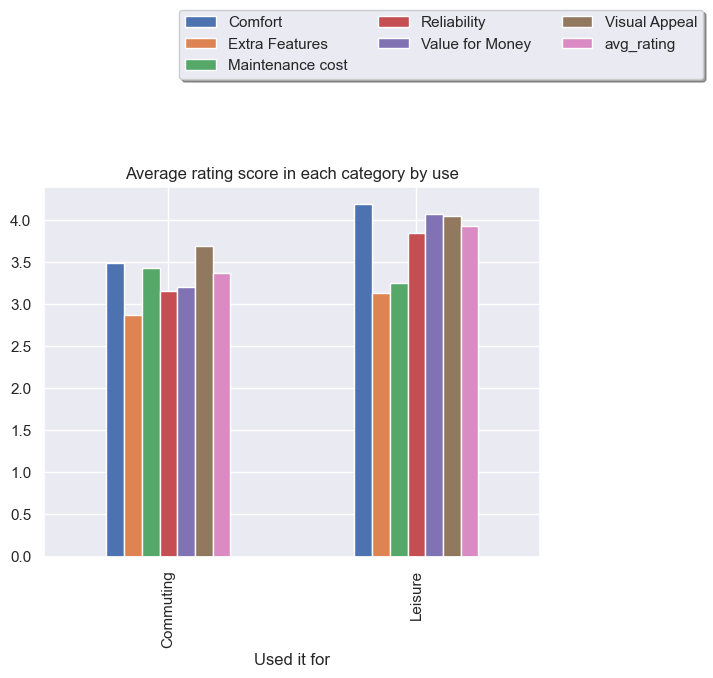

In [119]:
used_for_rating.plot(kind= 'bar')
plt.title("Average rating score in each category by use")
plt.legend(loc= 'upper center', bbox_to_anchor=(0.8, 1.5),
ncol=3, fancybox=True, shadow=True)
plt.show()

Commuters on average also give lower ratings than non-commuters, but the effect is farCommuters on average also give lower ratings than non-commuters, but the effect is far less pronounced than ownership. less pronounced than ownership.

Lets now see which the subgroup in our data that impacts the mean rating column of our data 

In [120]:
ownership_use_rating= pd.pivot_table(index= 'Used it for', columns= 'Ownership',values= 'avg_rating', data= moped_raw)
ownership_use_rating

Ownership,Never owned,Owned
Used it for,,
Commuting,4.163580,3.242761
Leisure,4.188272,3.807390


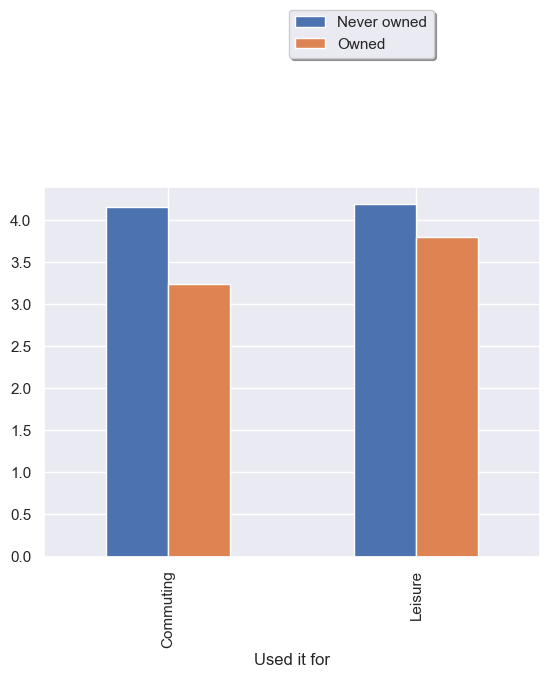

In [121]:
ownership_use_rating.plot(kind= 'bar')
plt.legend(loc= 'upper right', fancybox=True, shadow=True, bbox_to_anchor=(0.8, 1.5))
plt.show()

In order to facilitate modelling,  Values of 'model name' column that occured once or twice will be merged to an 'Others' value so as to make sure an example of each class occurs in the training and test set, we will also use the dataset inputed with zero to fit our model

In [122]:
dict_rename= {'Evolet Polo': 'Others', 'Joy e-bike Monster': 'Others', 'BGauss B8': 'Others'}
moped['Model Name'].replace(dict_rename, inplace= True)
moped['Model Name'].value_counts()

Hero Electric Flash        94
Hero Electric Optima       75
Okinawa Praise             73
Revolt RV 400              44
PURE EV EPluto 7G          40
Hero Electric Photon       34
Tork Kratos                33
Ather 450X                 26
OLA S1 Pro                 25
Ampere Magnus EX           25
Ampere REO                 21
Benling Aura               19
OLA S1                     18
TVS iQube                  17
Ampere Magnus Pro          16
PURE EV ETrance Neo        16
Bajaj Chetak               13
Okinawa Ridge Plus         12
Okinawa i-Praise           11
Bounce Infinity E1         10
Ampere Zeal                 9
Hero Electric Optima CX     9
Techo Electra Raptor        8
Hero Electric NYX           8
Techo Electra Emerge        7
Revolt RV 300               6
Okinawa Lite                6
Okinawa R30                 6
Joy e-bike Wolf             5
Gemopai Ryder               5
Yo Drift                    5
Others                      5
Gemopai Astrid Lite         3
Odysse Evo

## Exploratory Analysis
Describe what you found in the exploratory analysis. In your description you should:
- Reference at least two different data visualizations you created above to demonstrate the characteristics of single variables
- Reference at least one data visualization you created above to demonstrate the relationship between two or more variables
- Describe what your exploratory analysis has told you about the data
- Describe any changes you have made to the data to enable modeling

1. There are 38 models of moped in this dataset of which the Hero electric flash is the most popular as can be seen in the countplot of model names
2. Majority of the individuals in this dataset are owners of a moped
3. There is a huge correlation between average rating score of each columns when grouped by 'model name'
4.  From our correlation matrix heatmap we've seen that some of the questions are linked- some reviewers only received certain pairs of questions. This is further corroborated from the matrix plot of the missing values
5. A 'avg_rating' column was created because of the numerous null values in our dataset and also to help in the analysis
6. The values of the mean ratings fall between 1 and 6. Majority of the mean rating for each moped fall between 4-5 mean rating score, this is the reason for the shift in median value as shown in the boxplot of avg ratings. Minority of it fall between the 1-2 mean rating score and few has a mean rating of 3 as can be seen in the distribution plot
7. From the bar plot, we can see that Owners of a moped tend to give bad reviews about the moped
8. Commuting owners of a moped are the major source of bad reviews
9. Values of the model name columns that did not occur too frequently was merged to an 'Others' value, this is to make sure that our training test captures at least an example from each class

In [123]:
# Model Fitting
# Choose and fit a baseline model
# Choose and fit a comparison model
data= moped.drop('Ownership', axis= 1)
x= pd.get_dummies(data, columns= ['Used it for', 'Model Name'], drop_first= True)
y= moped['Ownership']
y.replace({'Owned':0, 'Never owned':1}, inplace= True)


The target value is the 'Ownership' column. The values of our target values were changed where a '1' represents a non owner and a '0' represents an owner we are using the rest of the columns to predict it. The 'model name' column and 'Used it for' column is preprocessed and converted to a format which is easier for our model to work with

Since our major objective is to predict whether a review comes from a persoon that doesnt own a moped or not, our modelling task is a classification task.

We will now split our dataset into training and test sets

In [124]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, stratify= y, random_state= 105)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(499, 42)
(499,)
(214, 42)
(214,)


To get a good performance from the model, we will scale our data to prevent effects of noise

In [125]:
ss= StandardScaler()
x_train_scaled= ss.fit_transform(x_train)
x_test_scaled= ss.transform(x_test)

Since we are dealing with a binary classification model, our baseline model will be the LinearRegression model

In [126]:
log= LogisticRegression()
log.fit(x_train_scaled, y_train)

LogisticRegression()

We will now check if our model is over fitting or not and the best way possible is to check the training and test accuracy of our model where;
1. An overfit model has a higher training accuracy than testing accuracy
2. An underfit model has a higher testing accuracy than training accuracy

In [127]:
print('Training accuracy is :', log.score(x_train_scaled, y_train))
print('Testing accuracy is :', log.score(x_test_scaled, y_test))

Training accuracy is : 0.8537074148296593
Testing accuracy is : 0.8364485981308412


Since there is no major difference between the values of the training and testing accuracy, our model is not underfitting on trainning data or overfitting data.

We will now fit a comparison model

In [128]:
svc= SVC(random_state= 105)
svc.fit(x_train_scaled, y_train)

SVC(random_state=105)

In [129]:
print('Training accuracy is :', svc.score(x_train_scaled, y_train))
print('Testing accuracy is :', svc.score(x_test_scaled, y_test))

Training accuracy is : 0.8476953907815631
Testing accuracy is : 0.8551401869158879


There is also no major difference in the training accuracy and test accuracy of our comparison model

## Model Fitting
Describe your approach to the model fitting. In your description you should:
- Describe what type of machine learning problem you are working on
- Describe which method you selected for the baseline model and explain why you chose this model
- Describe which method you selected for the comparison model and explain why you chose this model




1. The type of machine learning problem being face here is a supervised learning problem, the binary classification to be precise because the model needs to predict if a review comes from a person who doesnt own a moped
2. Logistic regression models are from the family of linear models and they are easier to train, efficient and they achieve good performance as can be seen, I had a accuracy of more than 80 percent without tuning any hyperparameters.
3. My comparison model, the SVC model is from the family of support vector machines, they are also easier to train like the logistic regression model but are designed to generate more complex decision boundaries.

Because our primary objective is to predict if reviews are coming from people who have never owned the moped, our primary concern is eliminating non-owners, even at the expense of some false positives. While we would prefer not to discard too many owner reviews, we are going to prioritize not wasting time on non-owner reviews. Which means that the primary metric we'd like to use to evaluate our models is going to be their recall/sensitivity.

We will now evaluate the performance of our models by their recall score and accuracy, a function will be created to evaluate the performance metrics of our data

In [130]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models
# Our metric of choice is the recall
def evaluate_model(model, x_train, x_test, y_train, y_test):
    ''' A function that helps to evaluate a model by returning its training score, accuracy score, classification report and confusion matrix'''

    pred= model.predict(x_test)
    print('Accuracy score is :', accuracy_score(y_test, pred))
    print('---------classification report---------\n', classification_report(y_test, pred))
    sns.heatmap(confusion_matrix(y_test, pred), annot= True)
    plt.title("Confusion Matrix")
    plt.show()

Accuracy score is : 0.8364485981308412
---------classification report---------
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       173
           1       0.64      0.34      0.44        41

    accuracy                           0.84       214
   macro avg       0.75      0.65      0.67       214
weighted avg       0.82      0.84      0.82       214



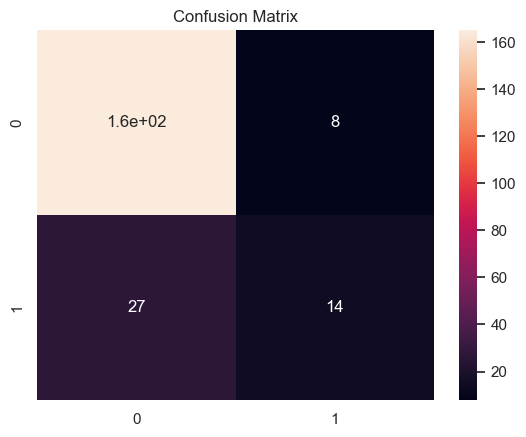

In [131]:
evaluate_model(log, x_train_scaled, x_test_scaled, y_train, y_test)

Our baseline Logistic regression model caught 34% of non-owner reviews. now let's try the comparison model.

Accuracy score is : 0.8551401869158879
---------classification report---------
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       173
           1       0.92      0.27      0.42        41

    accuracy                           0.86       214
   macro avg       0.88      0.63      0.67       214
weighted avg       0.86      0.86      0.82       214



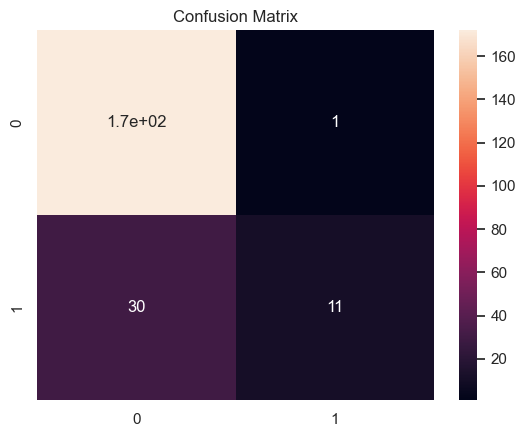

In [132]:
evaluate_model(svc, x_train_scaled, x_test_scaled, y_train, y_test)

Our comparison svc model caught 27% of non-owner reviews. This is a worse recall score than our baseline model.

Sincee the logistic regression performs better, it is my final model, lets tune the hyperparameters to see if we can get a better recall score

In [133]:
param_grid =  {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}
grid= GridSearchCV(log,param_grid, cv= 3, scoring= 'recall', verbose= True, n_jobs= -1 )
grid.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall', verbose=True)

In [134]:
grid.best_params_

{'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [135]:
grid.best_score_

0.479502688172043

From our hyperparameter tuning, we can see that our model can achieve a recall score of about 48% if given the following hyperparameters;
{'C': 0.0001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Accuracy score is : 0.8177570093457944
---------classification report---------
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       173
           1       0.53      0.41      0.47        41

    accuracy                           0.82       214
   macro avg       0.70      0.66      0.68       214
weighted avg       0.80      0.82      0.81       214



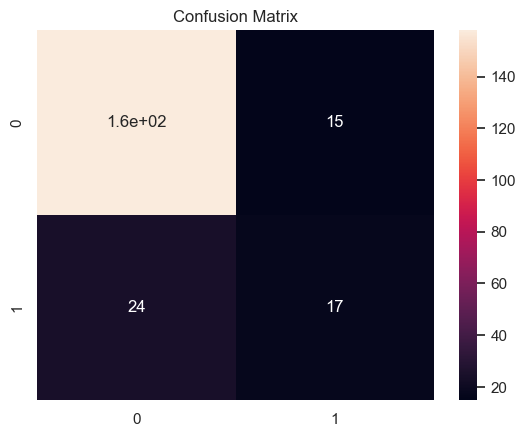

In [136]:
evaluate_model(grid, x_train_scaled, x_test_scaled, y_train, y_test)

The final model is the logistic regression model with tuned hyparameters with imputed missing values of zero, it has a recall score of 41%, although we lost some accuracy of about 3.8%, Our task however is to eliminate non-owener reviewers in order to focus on reviews by actual owners. As such the most important factor for us is recall balanced by accuracy (if our model returned a prediction of non-owner for everyone it would also be useless). We want to discard the maximum number of non-owner reviews without seriously damaging our overall accuracy. 

## Model Evaluation
Explain what the results of your evaluation tell you. You should:
- Describe which metric you have selected to compare the models and why
- Explain what the outcome of this evaluation tells you about the performance of your models
- Identify, based on the evaluation, which you would consider to be the better performing approach


Because our primary objective is to predict if reviews are coming from people who have never owned the moped, our primary concern is eliminating non-owners, even at the expense of some false positives. While we would prefer not to discard too many owner reviews, we are going to prioritize not wasting time on non-owner reviews. Which means that the primary metric we'd like to use to evaluate our models is going to be their recall/sensitivity.

The outcome of my evaluations tells me that my svc model will capture and discard about 27% of the reviews of people that doesnt own a moped while the logistic regression model will capture about 34%

Our Model winner:
LogisticRegression(C= 0.0001, max_iter= 100, penalty= 'l2', solver= liblinear), using 0 to replace null values in the dataset.
accuracy: 0.8177570093457944
accurately predicted: 17/41 non-onwers. (recall = .41)
With this model we can discard about 41% of non-owner reviews without unduly discarding too many real users' reviews. So while we cannot predict all non-owner reviews, we can significanlty reduce the time wasted on reviews by non-owners.
Another factor to we should take into account from our exploratory data analysis is that almost all non-owner reviews are very strongly positive. Reviews that have something bad to say are disproportionally from owners of the moped. Paying particular attention to reviews that have something bad to say is a surefire way of focusing on feedback from actual owners.
In conjunction with our machine learning model this can really help streamline the company's use of customer reviews to improve the product.


## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam